In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from matplotlib.offsetbox import AnchoredText
import statsmodels.formula.api as smf

In [2]:
ls *csv

Females_test.csv               TDA_features_full.csv
Females_train.csv              females_tda_bd_filtered.csv
HCPfMRI998.csv                 males_tda_bd_filtered.csv
Males_test.csv                 tda_bd_filtered.csv
Males_train.csv                test.csv
TDA_features_filtered_all.csv


In [3]:
df=pd.read_csv('tda_bd_filtered.csv')

In [67]:
df_full=pd.read_csv('tda_bd_full.csv')

In [68]:
df_full

,Unnamed: 0,Subject,Gender,Age,Age.1,PicSeq_AgeAdj,CardSort_AgeAdj,Flanker_AgeAdj,ReadEng_AgeAdj,PicVocab_AgeAdj,...,p3cliques_DMN_sum_p2high,p3cliques_FPN_sum_p2high,p4cliques_DMN_ent_p2low,p4cliques_FPN_ent_p2low,p4cliques_DMN_sum_p2low,p4cliques_FPN_sum_p2low,p4cliques_DMN_ent_p2high,p4cliques_FPN_ent_p2high,p4cliques_DMN_sum_p2high,p4cliques_FPN_sum_p2high
0,0,175540,M,31-35,31-35,84.79,103.39,105.12,128.13,130.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,175540,M,31-35,31-35,84.79,103.39,105.12,128.13,130.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,548250,M,22-25,22-25,81.19,114.82,113.29,1298786.00,935854.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,497865,M,26-30,26-30,76.04,109.93,94.75,130.22,107.72,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,199453,M,22-25,22-25,104.06,95.91,115.46,101.13,116.44,...,16.717480,7.723577,48.275759,32.211633,17.028986,12.681159,61.092013,16.454606,20.294118,7.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,957974,F,26-30,26-30,112.44,110.27,97.50,96.54,112.05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
495,495,713239,F,26-30,26-30,134.81,106.93,101.72,118.23,116.91,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,496,130619,F,26-30,26-30,134.81,109.14,104.87,1280306.00,1281598.00,...,22.983871,8.938172,149.790801,14.043663,40.476190,7.142857,93.320320,16.781053,28.004292,8.047210
497,497,108323,F,26-30,26-30,130.24,105.58,110.49,106.27,105.76,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
males=pd.read_csv('males_tda_bd_filtered.csv')

In [5]:
females=pd.read_csv('females_tda_bd_filtered.csv')

In [7]:
#females

# Import and organize data

In [53]:
males = pd.read_csv('/Users/minneschepers/Desktop/HCP/Data/Males_exp.csv')
females = pd.read_csv('/Users/minneschepers/Desktop/HCP/Data/Females_exp.csv')

In [37]:
# Order tda columns in lists
tda_features = males.columns[27:]

DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]
global_features = [i for i in tda_features if i not in DMN_curvatures if i not in FPN_curvatures if i not in all_curvatures if i not in p3_cliques if i not in p4_cliques]

WM_age = ['lswmt_age']
EF_age = ['dccs_age', 'flanker_age', 'EF_age']
all_kur = [i for i in tda_features if 'kur' in i]
all_skew = [i for i in tda_features if 'skew' in i]
all_std = [i for i in tda_features if 'std' in i]
all_ent = [i for i in tda_features if 'curv_ent' in i]

In [19]:
WM = ['lswmt_unadjusted', 'lswmt_age']
EF = ['dccs_unadjusted', 'dccs_age',
       'flanker_unadjusted', 'flanker_age',
      'EF_unadjusted', 'EF_age']

# Define functions for data exploration

In [9]:
def regplot_mf(X_column, y_column, order):
    
    order = order

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    fig.suptitle(X_column)

    # Plot males
    df = males
    X = df[X_column]
    y = df[y_column]
    
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue
    
    sns.regplot(x=X, y=y, ax=ax1)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax1.add_artist(anchored_text)
    ax1.title.set_text('Males')
    
    # Plot females
    df = females
    X = df[X_column]
    y = df[y_column]
    
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order, ax=ax2)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax2.add_artist(anchored_text)
    ax2.title.set_text('Females')

    plt.show()

In [10]:
def regplot(X_column, y_column, df, order):
    
    order = order
    
    X = df[X_column]
    y = df[y_column]
    
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order)
    plt.figtext(0.72, 0.78, f' R2: {R2} \n p: {p_value}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()

In [11]:
def z_scored_df(df, X_column, cut_off, print_zscores):
    
    z_scored = np.abs(stats.zscore(df[X_column]))
    if print_zscores == 1:
        print(z_scored)
    filtered = (z_scored < cut_off)
    df_new = df[filtered]
    
    print(f'Number excluded: {df.shape[0] - df_new.shape[0]}')
    
    return df_new

In [12]:
def z_scored_regplot(x, y, dataframe, cut_off, print_zscores, order):
    
    X_column = x
    y = y
    df = dataframe
    
    regplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores), order)

In [82]:
def regplots(X_column, y_column, df, zscore):
    
    order = 2
    
    if zscore == 0:
        df = df
    else:
        df = z_scored_df(df, X_column, cut_off=zscore, print_zscores=0)
    
    X = df[X_column]
    y = df[y_column]
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    fig.suptitle(X_column)

    # Plot linear regression
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = est2.pvalues[1]
    print(p_value)
    R2 = est2.rsquared
    print(R2)
    
    sns.regplot(x=X, y=y, ax=ax1)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax1.add_artist(anchored_text)
    
    # Plot polynomial regression
    
    #model = np.poly1d(np.polyfit(X, y, order))
    #results = smf.ols(formula='y ~ model(X)', data=df).fit()
    #R2 = results.rsquared
    #p_value = results.f_pvalue

    #sns.regplot(x=X, y=y, order=order, ax=ax2)
    #anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    #ax2.add_artist(anchored_text)
    #if p_value < 0.05:
    plt.show()

In [62]:
def get_best_predictors(x, y, dataframe, n, zscore):
        
    # This function gets the n best predictors for a target and produces regression plots
    
    print(f'\n---------------- y = {y} ----------------\n')
    df = dataframe
    columns = []
    
    [columns.append(i) for i in x]
    columns.append(y)

    # Create correlation matrix
    corr = df[columns].corr()
    # Only include column with corr values with y-column, and exclude row with y (autocorrelation)
    # Absolutize to also get large negative correlation values
    corr = np.abs(corr.iloc[:-1,-1:])
    # Get n largest corr values
    corr = corr.nlargest(n, corr.columns)
    print(corr)
    print('\n')
    # Save predictors to list
    best_predictors = corr.index.to_list()
    # Make for each predictor regression plot
    [regplots(predictor, y, df, zscore) for predictor in best_predictors]
    
    return best_predictors
    
# get_best_predictors(global_features, 'fluidcog_age', df_no_nan, n=3, zscore=0)

In [39]:
tda_features=list(df.columns)[22:34]

In [40]:
tda_features

['bc_AUC_dim0',
 'bc_AUC_dim1',
 'pl_AUC_dim0',
 'pl_AUC_dim1',
 'top_vec_dim0',
 'top_vec_dim1',
 'S_entropy_dim0',
 'S_entropy_dim1',
 'Euler_sum',
 'total_cliques_sum',
 'triangles_sum',
 'Phase_transition_1']

In [65]:
males

,Unnamed: 0,Subject,Gender,Age,Age.1,PicSeq_AgeAdj,CardSort_AgeAdj,Flanker_AgeAdj,ReadEng_AgeAdj,PicVocab_AgeAdj,...,p3cliques_DMN_sum_p2high,p3cliques_FPN_sum_p2high,p4cliques_DMN_ent_p2low,p4cliques_FPN_ent_p2low,p4cliques_DMN_sum_p2low,p4cliques_FPN_sum_p2low,p4cliques_DMN_ent_p2high,p4cliques_FPN_ent_p2high,p4cliques_DMN_sum_p2high,p4cliques_FPN_sum_p2high
0,0,175540,M,31-35,31-35,84.79,103.39,105.12,128.13,130.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,175540,M,31-35,31-35,84.79,103.39,105.12,128.13,130.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,182840,M,31-35,31-35,91.68,116.36,108.56,119.63,107.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,548250,M,22-25,22-25,81.19,114.82,113.29,1298786.00,935854.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,199453,M,22-25,22-25,104.06,95.91,115.46,101.13,116.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,148436,M,26-30,26-30,94.20,91.36,88.79,9235883.00,9622433.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,243,176441,M,26-30,26-30,91.88,93.43,107.39,1253154.00,1154986.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,244,144933,M,26-30,26-30,91.25,88.63,88.13,1124302.00,1135219.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245,245,173738,M,31-35,31-35,134.81,111.22,111.44,1242675.00,1331783.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
tda_features

['bc_AUC_dim0',
 'bc_AUC_dim1',
 'pl_AUC_dim0',
 'pl_AUC_dim1',
 'top_vec_dim0',
 'top_vec_dim1',
 'S_entropy_dim0',
 'S_entropy_dim1',
 'Euler_sum',
 'total_cliques_sum',
 'triangles_sum',
 'Phase_transition_1']

In [72]:
selected_features

['bc_AUC_dim0',
 'bc_AUC_dim1',
 'pl_AUC_dim0',
 'pl_AUC_dim1',
 'top_vec_dim0',
 'top_vec_dim1',
 'S_entropy_dim0',
 'S_entropy_dim1',
 'Euler_sum',
 'total_cliques_sum',
 'triangles_sum',
 'Phase_transition_1']

In [77]:
test=list(df.columns)[5:19]

In [78]:
test

['PicSeq_AgeAdj',
 'CardSort_AgeAdj',
 'Flanker_AgeAdj',
 'ReadEng_AgeAdj',
 'PicVocab_AgeAdj',
 'ProcSpeed_AgeAdj',
 'ListSort_AgeAdj',
 'CogFluidComp_AgeAdj',
 'CogEarlyComp_AgeAdj',
 'CogTotalComp_AgeAdj',
 'CogCrystalComp_AgeAdj',
 'Endurance_AgeAdj',
 'Dexterity_AgeAdj',
 'Strength_AgeAdj']


---------------- y = PicSeq_AgeAdj ----------------

              PicSeq_AgeAdj
top_vec_dim0       0.092294
bc_AUC_dim0        0.087903
pl_AUC_dim0        0.077472


Number excluded: 2
0.0465518512604372
0.007979134950038214


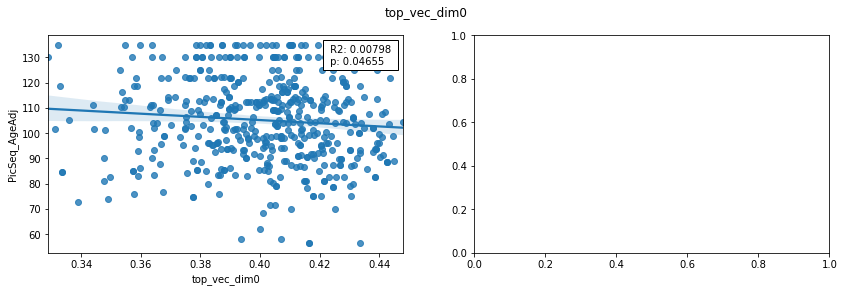

Number excluded: 1
0.052915158124227236
0.007532721084086869


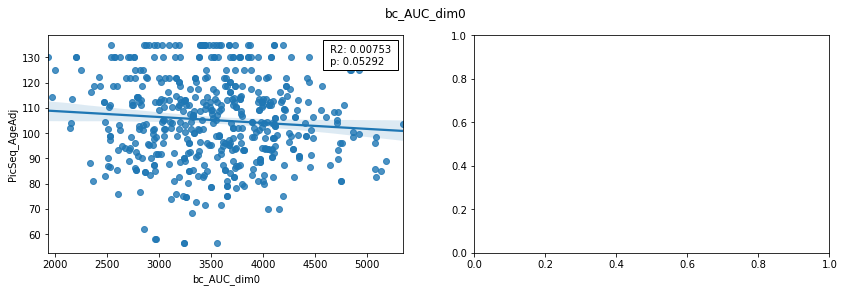

Number excluded: 1
0.07456964828305028
0.006396108240054765


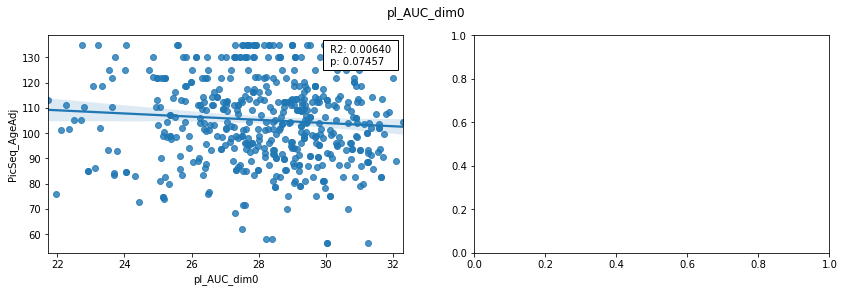


---------------- y = CardSort_AgeAdj ----------------

               CardSort_AgeAdj
pl_AUC_dim1           0.148130
triangles_sum         0.136692
Euler_sum             0.133460


Number excluded: 0
nan
nan


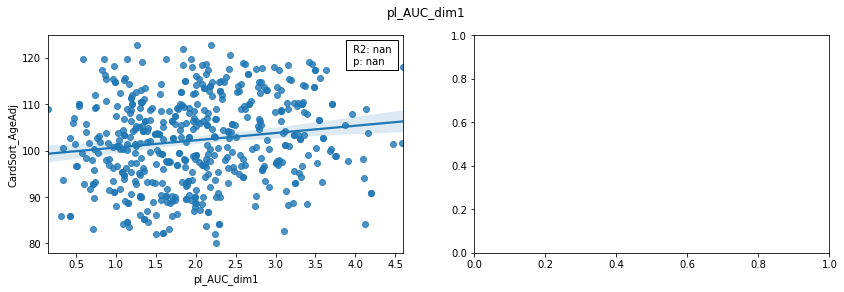

Number excluded: 4
nan
nan


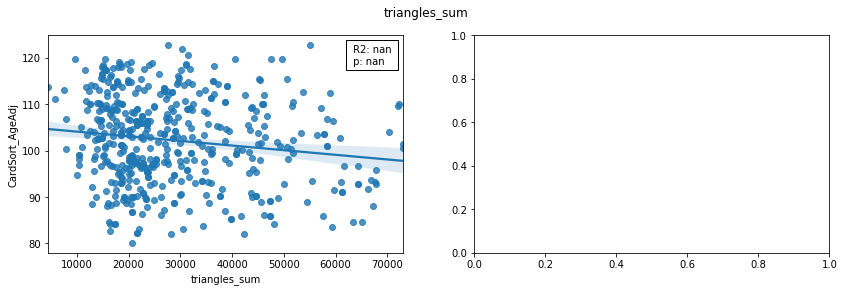

Number excluded: 0
nan
nan


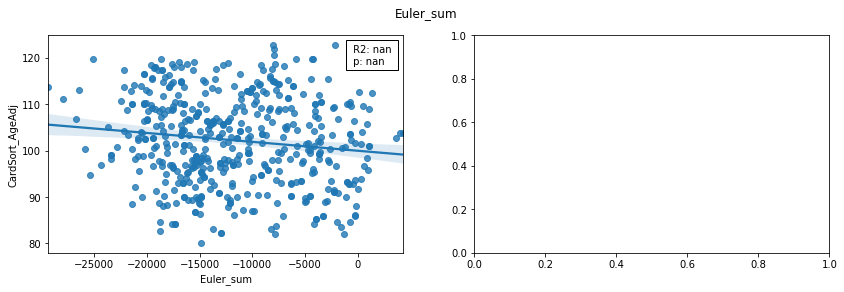


---------------- y = Flanker_AgeAdj ----------------

                   Flanker_AgeAdj
triangles_sum            0.138242
total_cliques_sum        0.131108
Euler_sum                0.117553


Number excluded: 4
0.0017996663174607798
0.019589122433498862


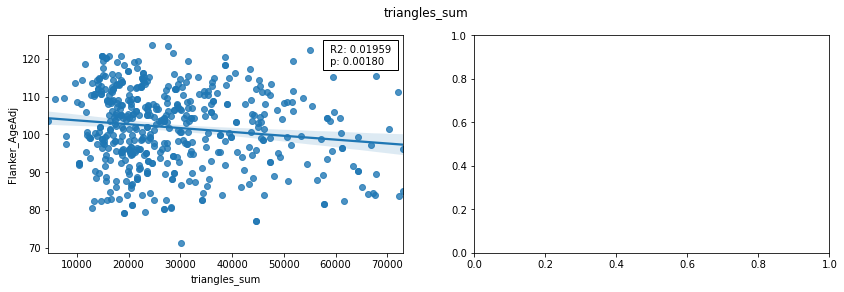

Number excluded: 9
0.0057551952065256675
0.015520116087115676


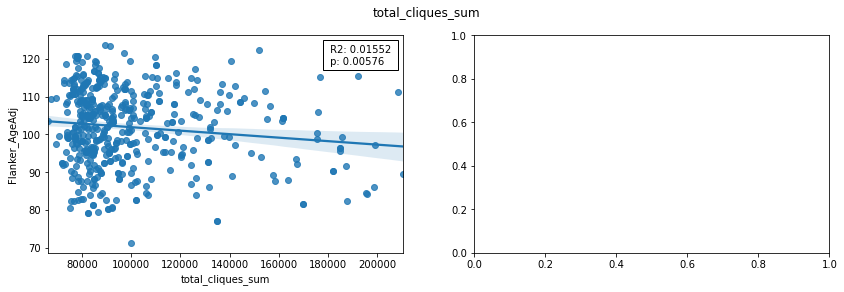

Number excluded: 0
0.008576949151079429
0.013818741957862257


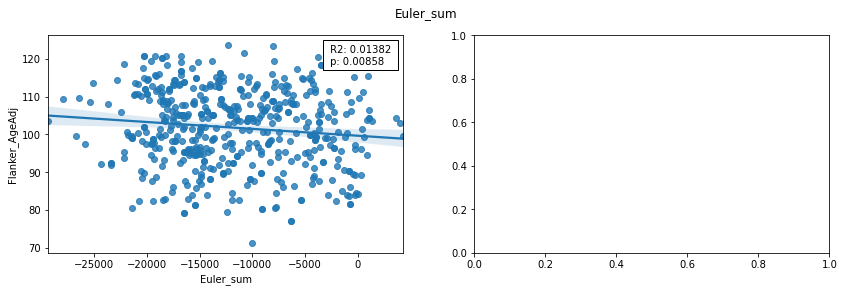


---------------- y = ReadEng_AgeAdj ----------------

                ReadEng_AgeAdj
S_entropy_dim1        0.094358
pl_AUC_dim0           0.081571
top_vec_dim0          0.079212


Number excluded: 0
0.035099119674923525
0.008903412946710487


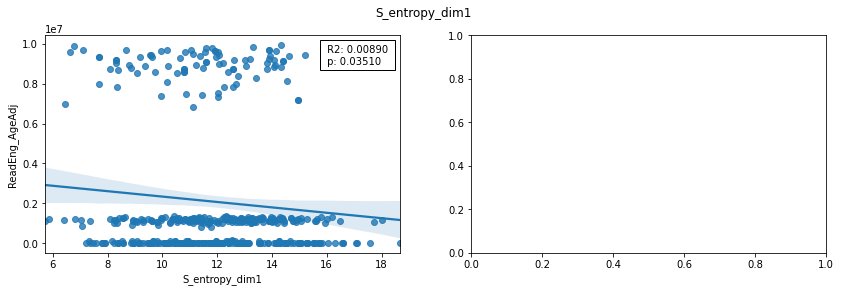

Number excluded: 1
0.08167988463527494
0.006098685839297402


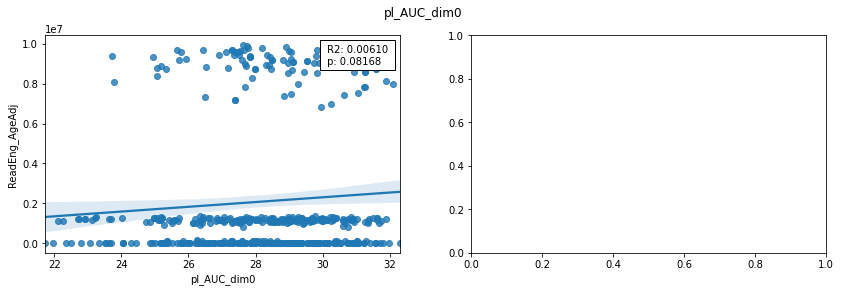

Number excluded: 2
0.10738568240480369
0.005228502159906112


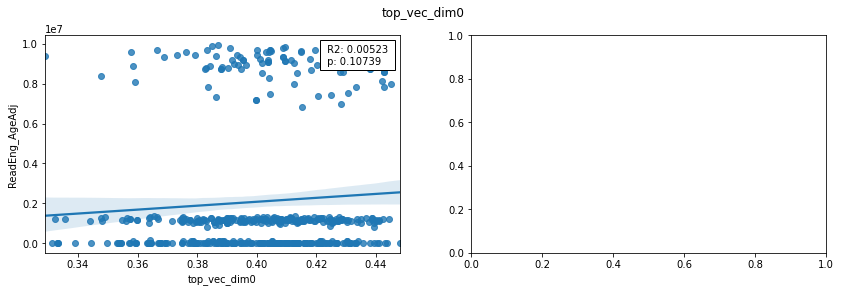


---------------- y = PicVocab_AgeAdj ----------------

                PicVocab_AgeAdj
pl_AUC_dim0            0.065561
S_entropy_dim1         0.058392
top_vec_dim0           0.051574


Number excluded: 1
0.16491367339002408
0.00388462557362379


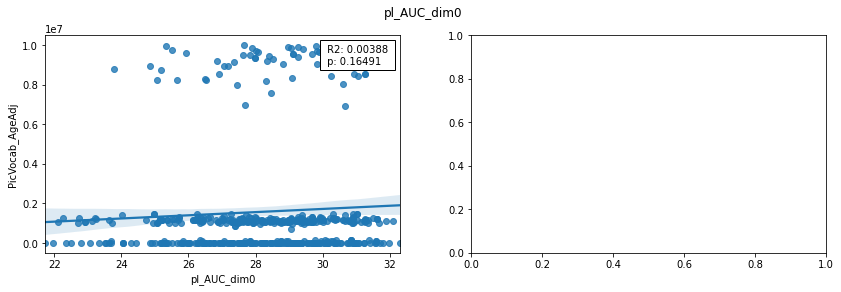

Number excluded: 0
0.1928402422696289
0.0034096478334501024


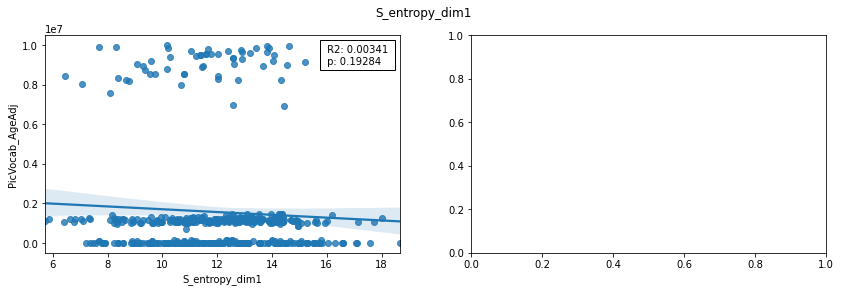

Number excluded: 2
0.3181522100119097
0.002013191901542033


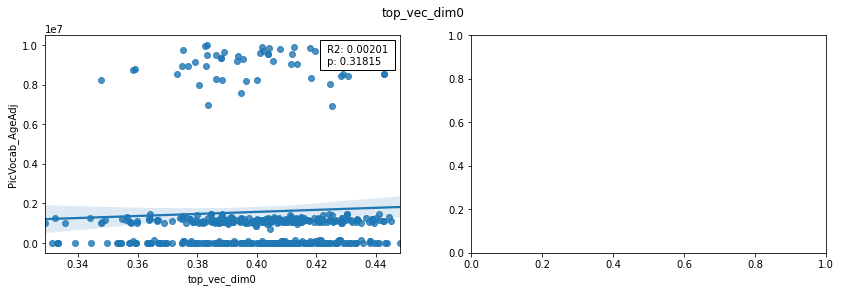


---------------- y = ProcSpeed_AgeAdj ----------------

                   ProcSpeed_AgeAdj
total_cliques_sum          0.172068
pl_AUC_dim1                0.162585
triangles_sum              0.154216


Number excluded: 9
0.02551125510524787
0.010181326371863086


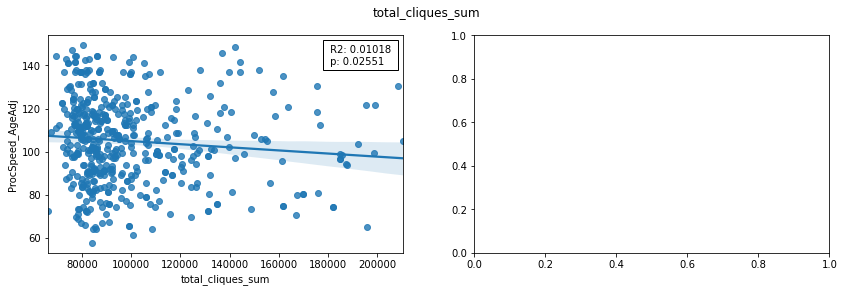

Number excluded: 0
0.0002652597544743878
0.026433865647309873


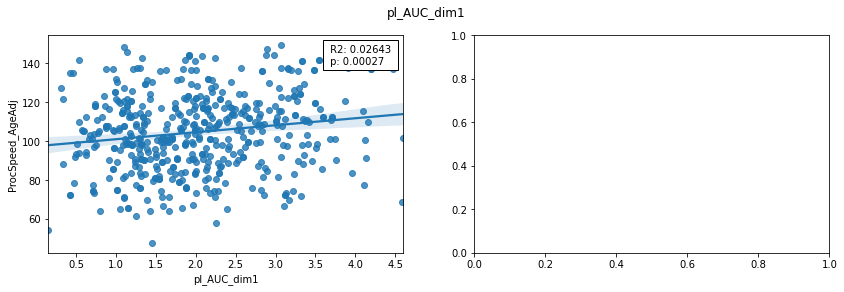

Number excluded: 4
0.005092127004331815
0.015805560331617174


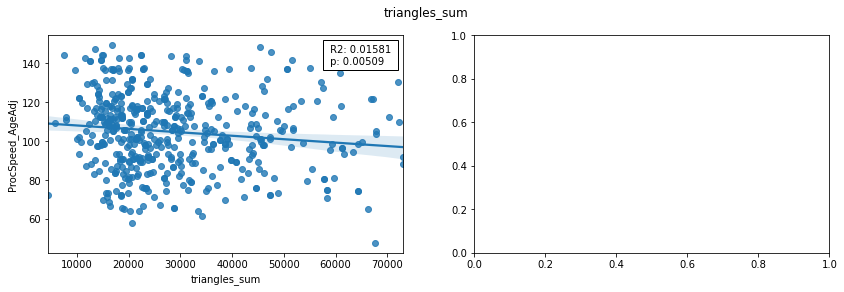


---------------- y = ListSort_AgeAdj ----------------

              ListSort_AgeAdj
top_vec_dim1         0.093638
pl_AUC_dim0          0.082892
top_vec_dim0         0.071127


Number excluded: 4
0.07951608667199876
0.006223722983435098


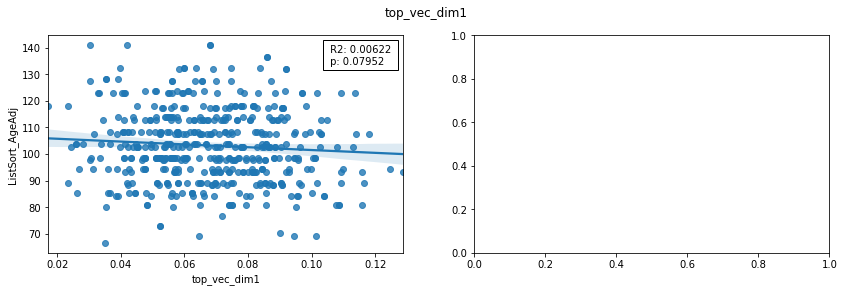

Number excluded: 1
0.04688643981110174
0.007938963076690508


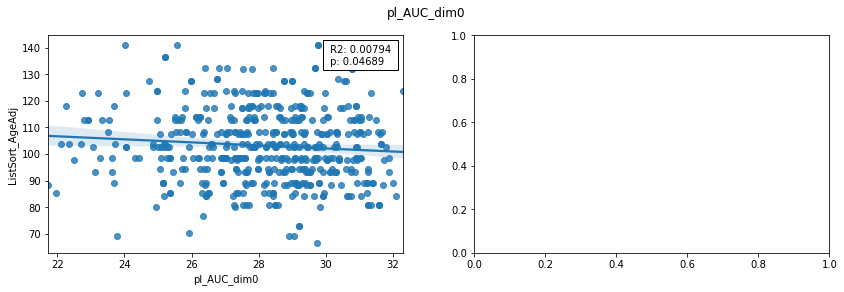

Number excluded: 2
0.11214281718266092
0.005090656401722127


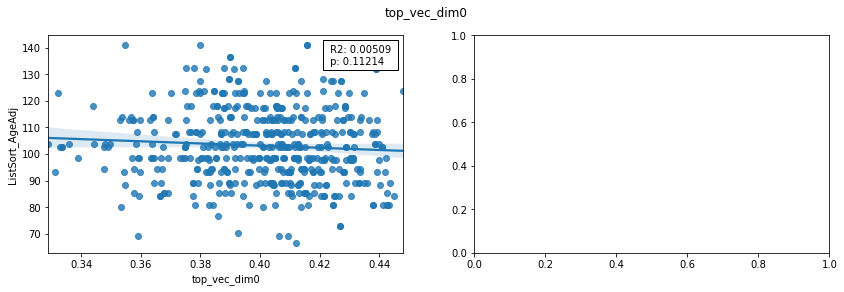


---------------- y = CogFluidComp_AgeAdj ----------------

                   CogFluidComp_AgeAdj
pl_AUC_dim1                   0.132700
triangles_sum                 0.128472
total_cliques_sum             0.120032


Number excluded: 0
nan
nan


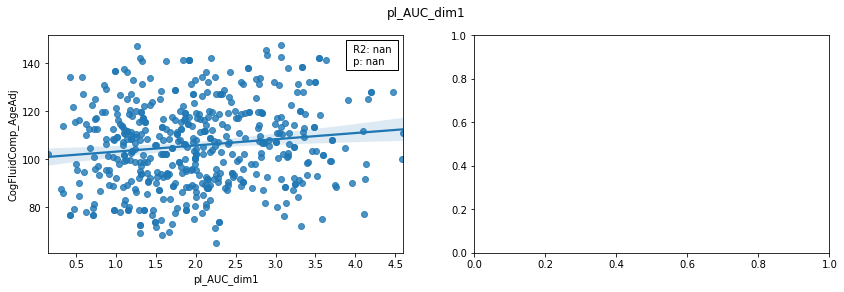

Number excluded: 4
nan
nan


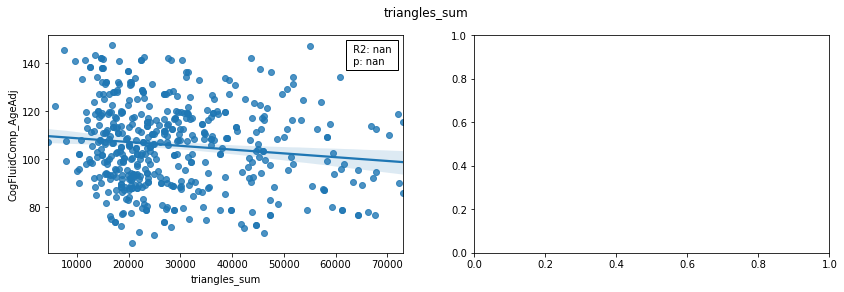

Number excluded: 9
nan
nan


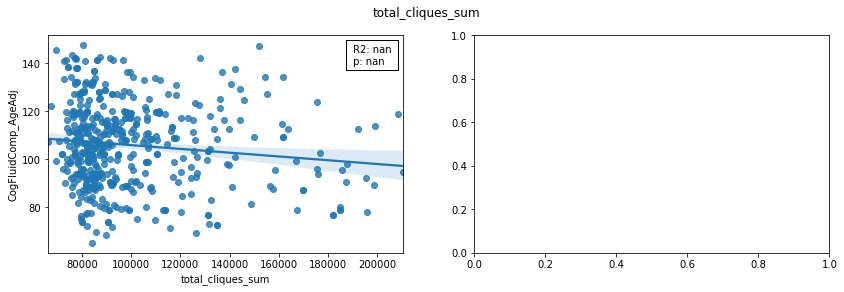


---------------- y = CogEarlyComp_AgeAdj ----------------

               CogEarlyComp_AgeAdj
triangles_sum             0.119790
top_vec_dim0              0.118607
Euler_sum                 0.112489


Number excluded: 4
nan
nan


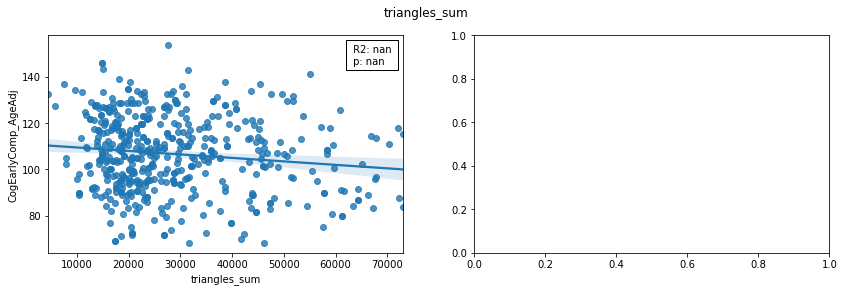

Number excluded: 2
nan
nan


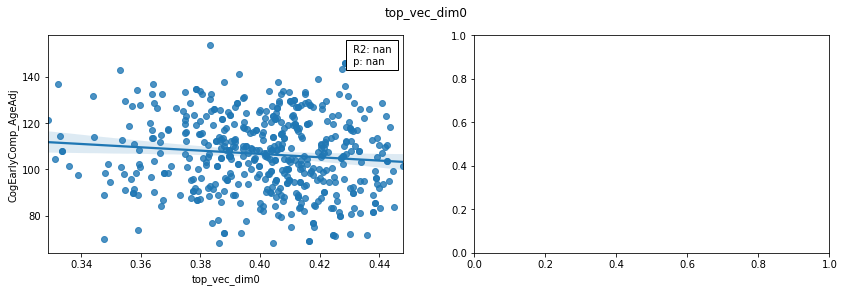

Number excluded: 0
nan
nan


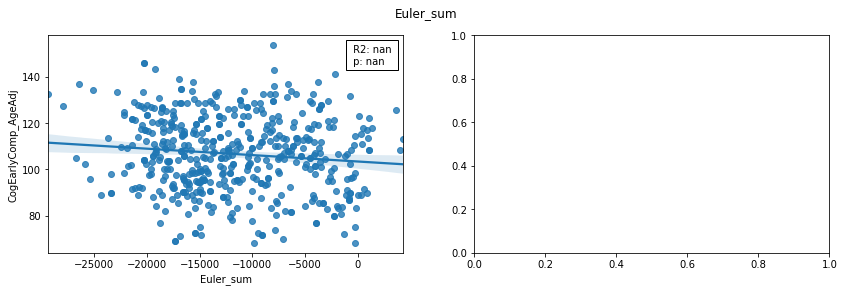


---------------- y = CogTotalComp_AgeAdj ----------------

               CogTotalComp_AgeAdj
top_vec_dim0              0.140295
Euler_sum                 0.118027
triangles_sum             0.115604


Number excluded: 2
nan
nan


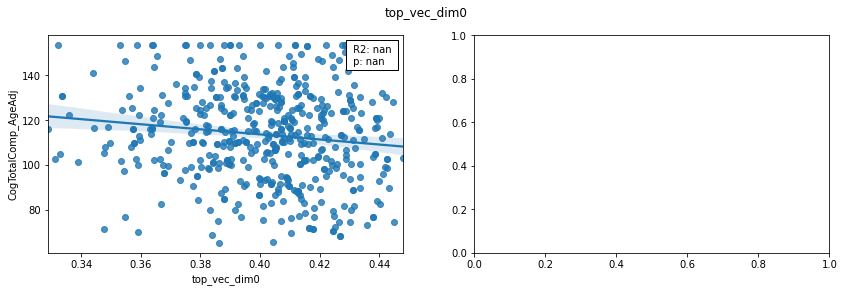

Number excluded: 0
nan
nan


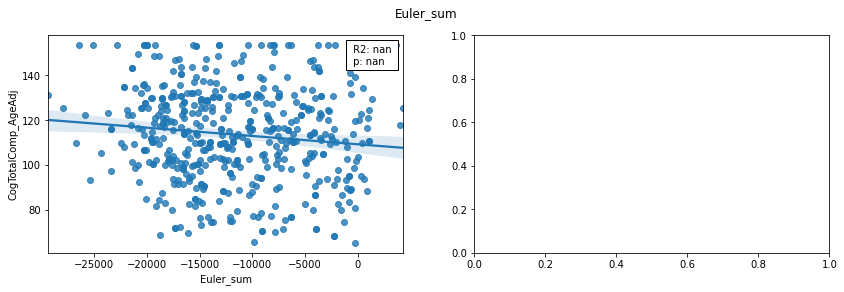

Number excluded: 4
nan
nan


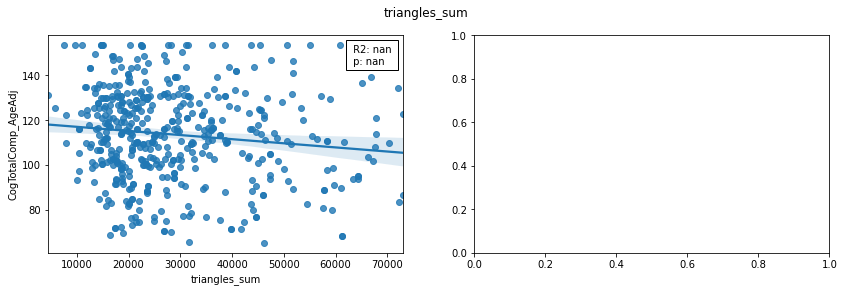


---------------- y = CogCrystalComp_AgeAdj ----------------

              CogCrystalComp_AgeAdj
top_vec_dim0               0.127982
pl_AUC_dim0                0.093280
Euler_sum                  0.079950


Number excluded: 2
nan
nan


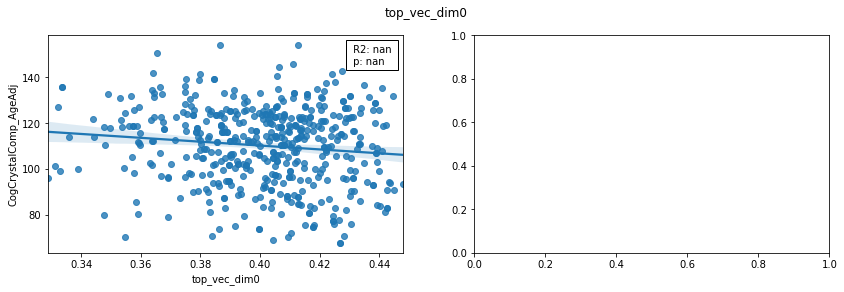

Number excluded: 1
nan
nan


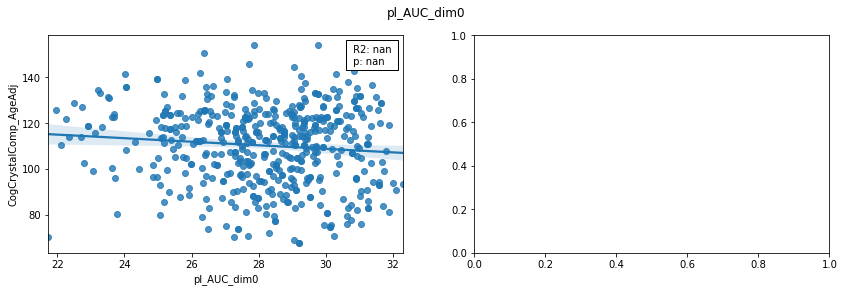

Number excluded: 0
nan
nan


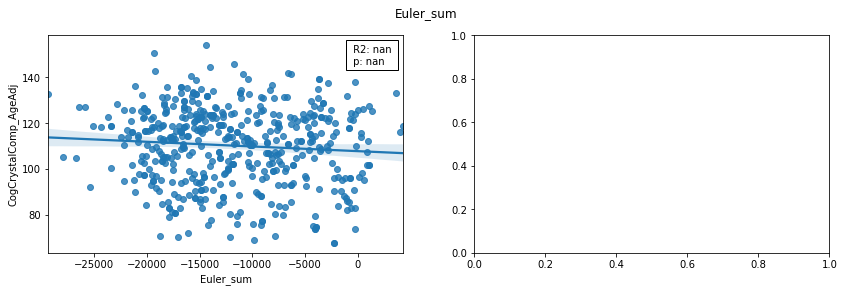


---------------- y = Endurance_AgeAdj ----------------

                   Endurance_AgeAdj
triangles_sum              0.113712
total_cliques_sum          0.110656
Euler_sum                  0.096899


Number excluded: 4
0.04540713185240416
0.008095880493418917


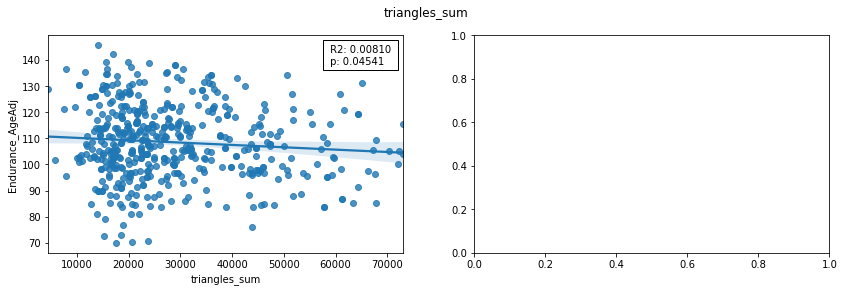

Number excluded: 9
0.0420728082345087
0.008440622685256027


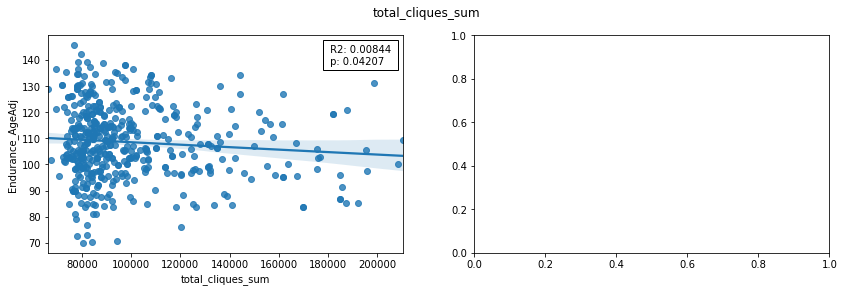

Number excluded: 0
0.03044762383886199
0.009389344924196852


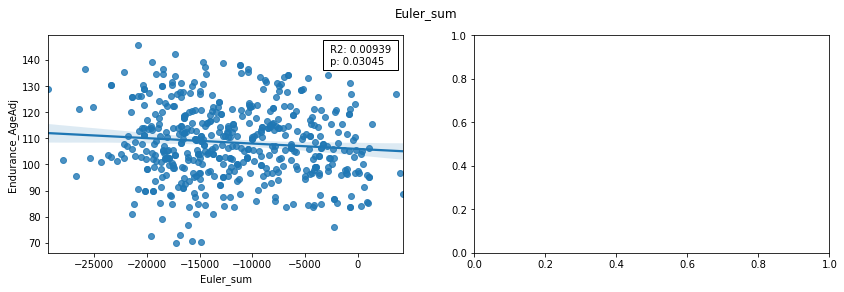


---------------- y = Dexterity_AgeAdj ----------------

                Dexterity_AgeAdj
S_entropy_dim0          0.139130
bc_AUC_dim1             0.083102
S_entropy_dim1          0.068475


Number excluded: 8
0.005354289353205308
0.015751189920496844


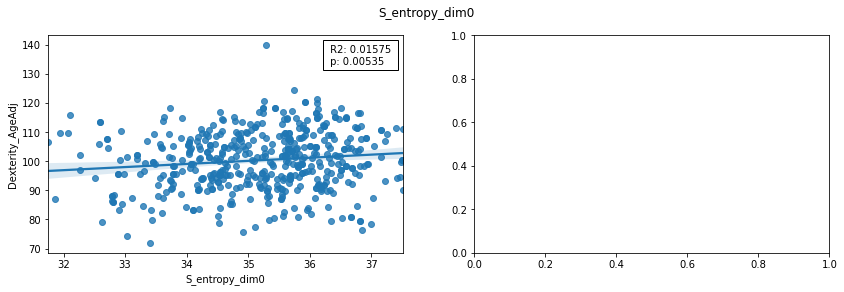

Number excluded: 1
0.04199286061137394
0.008311356733154529


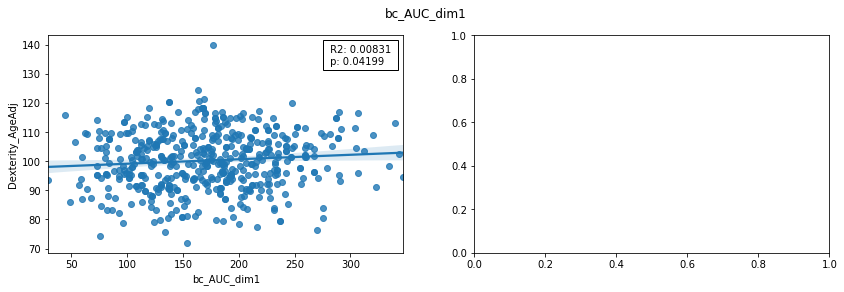

Number excluded: 0
0.12661633658106153
0.0046888818201424876


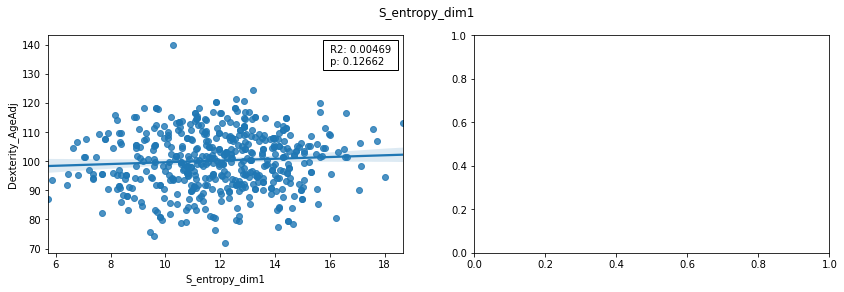


---------------- y = Strength_AgeAdj ----------------

                Strength_AgeAdj
S_entropy_dim0         0.234299
bc_AUC_dim0            0.131668
top_vec_dim0           0.097851


Number excluded: 8
nan
nan


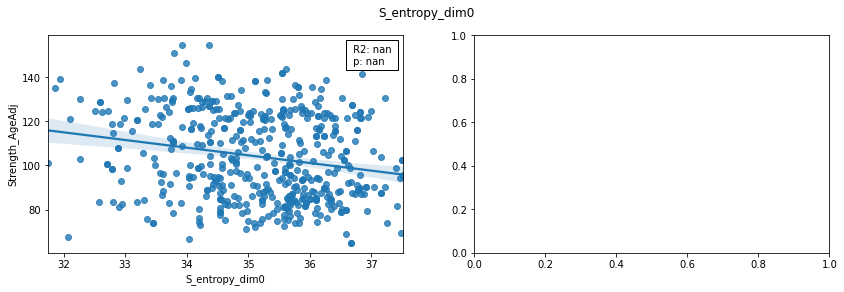

Number excluded: 1
nan
nan


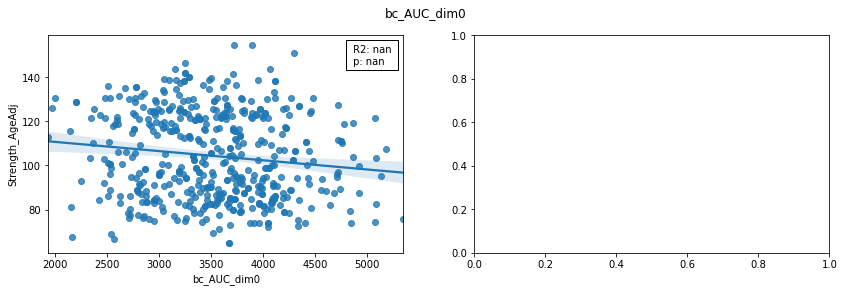

Number excluded: 2
nan
nan


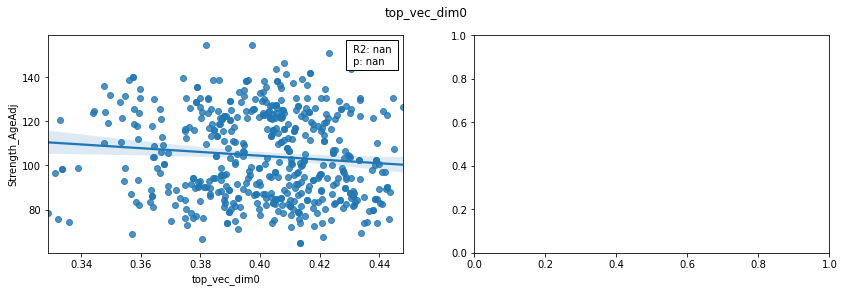

In [85]:
selected_features = list(tda_features)
#to_remove = ['curv_skew_FPN_0.05', 'curv_kur_FPN_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

#[selected_features.remove(i) for i in to_remove if i in selected_features]
for i in test:
    best_predictors = get_best_predictors(selected_features, i, df_full, n=3, zscore=3)

# Relationship between age and TDA for males and females


---------------- y = age_years ----------------

                   age_years
bc_AUC_dim0         0.385783
S_entropy_dim0      0.362699
curv_std_FPN_0.05   0.195728
curv_std_DMN_0.05   0.192331
curv_std_all_0.05   0.184864
bc_AUC_dim1         0.176704
curv_std_all_0.02   0.174709
curv_std_FPN_0.02   0.168747
S_entropy_dim1      0.159050
top_vec_dim0        0.153746


Number excluded: 1


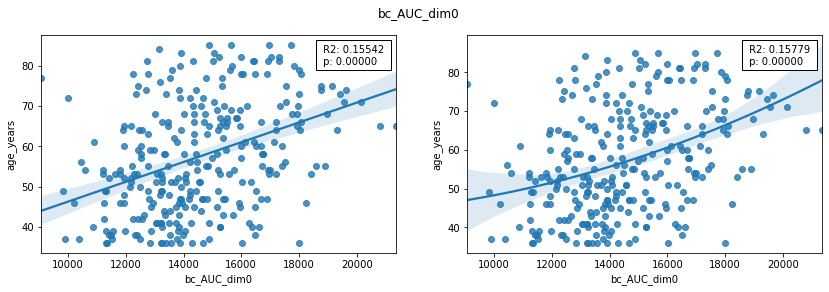

Number excluded: 4


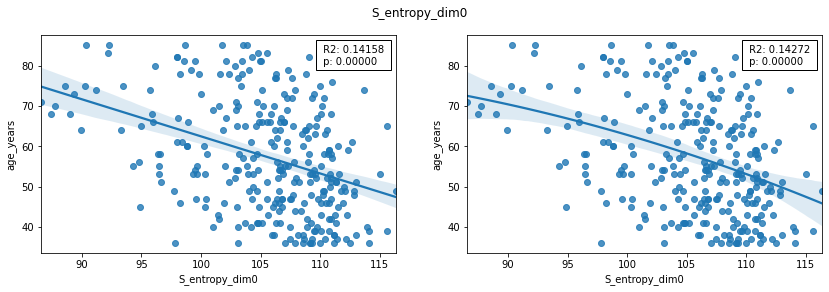

Number excluded: 6


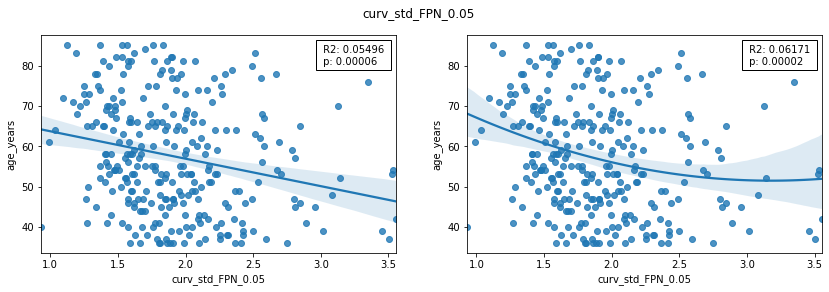

Number excluded: 5


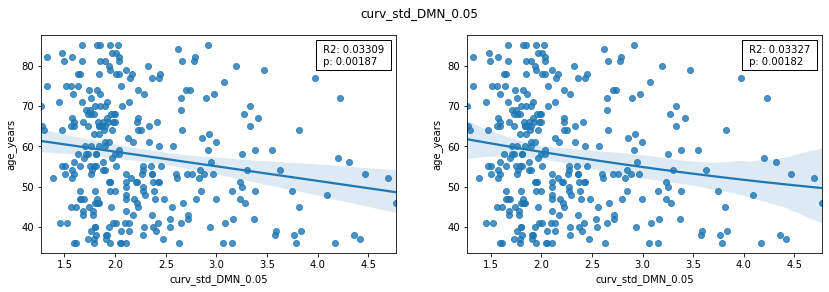

Number excluded: 5


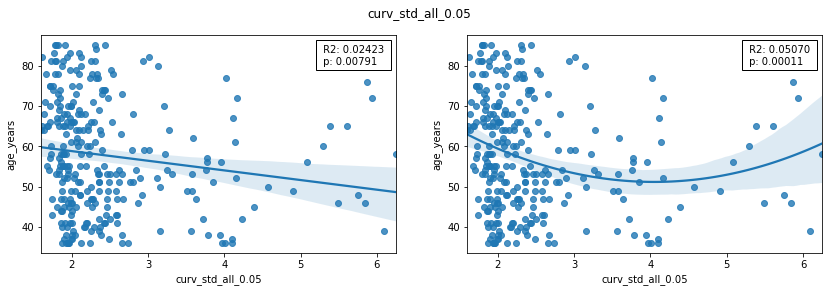

Number excluded: 0


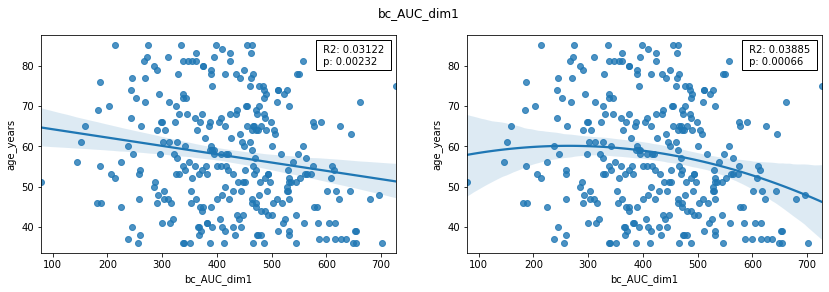

Number excluded: 2


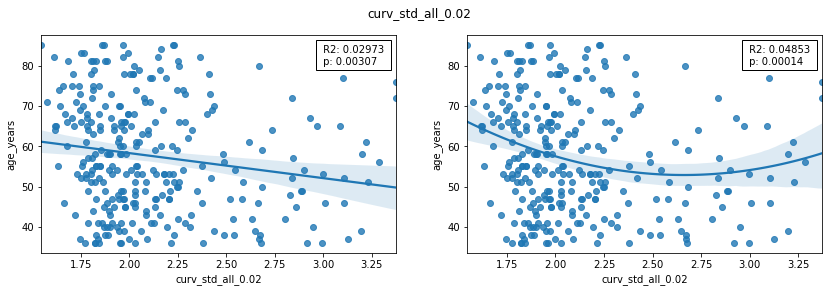

Number excluded: 5


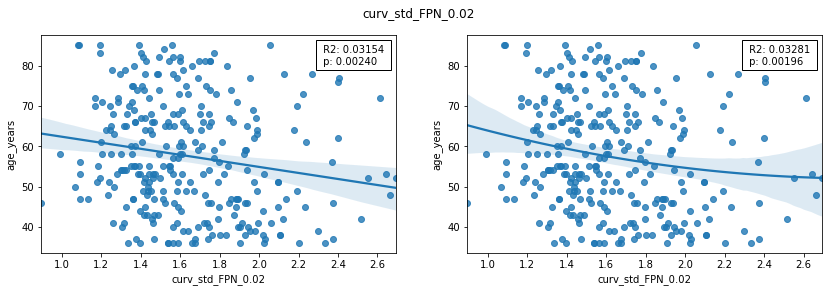

Number excluded: 2


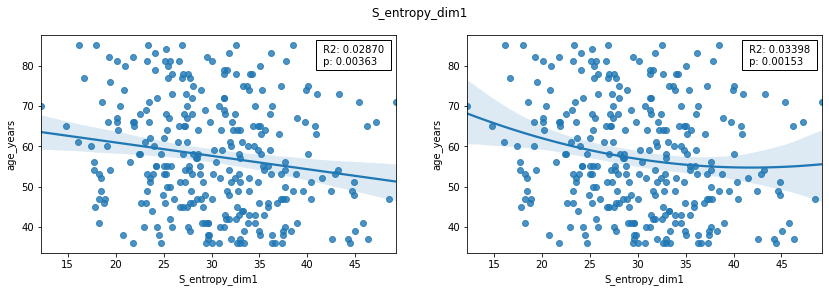

Number excluded: 3


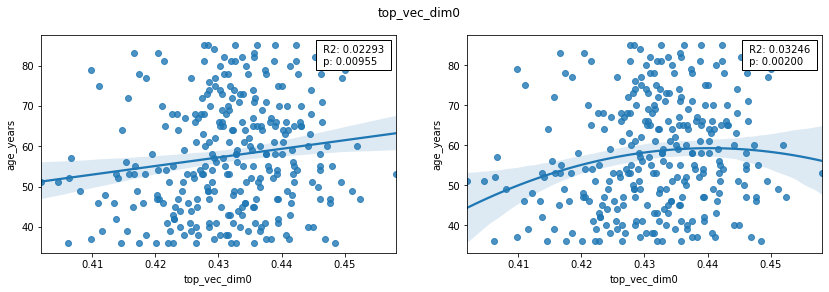

In [58]:
selected_features = list(tda_features)
to_remove = ['curv_skew_FPN_0.05', 'curv_kur_FPN_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features]

best_predictors = get_best_predictors(selected_features, 'age_years', malesfemales, n=10, zscore=3)

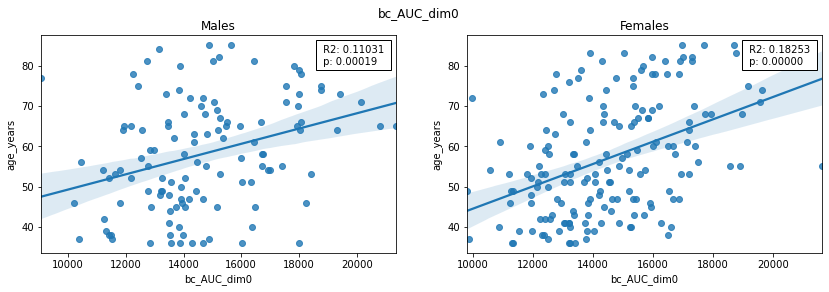

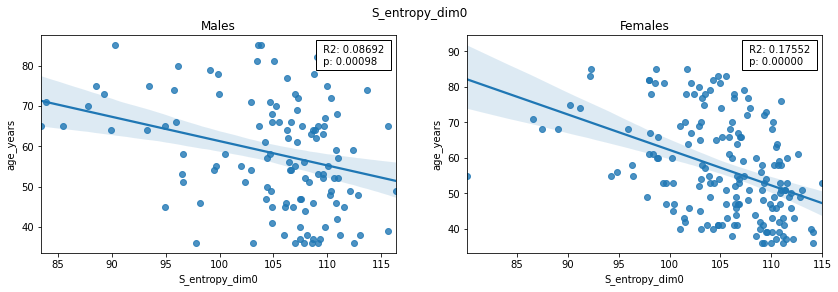

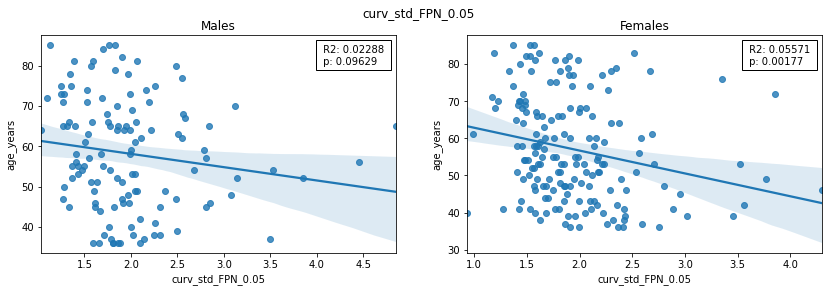

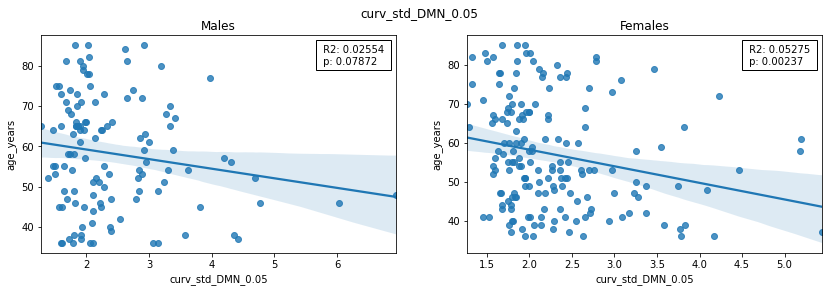

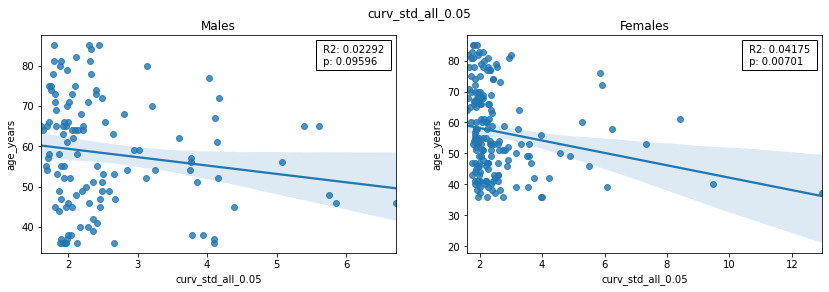

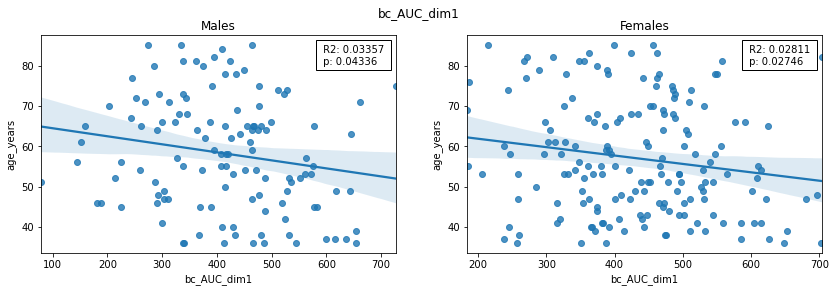

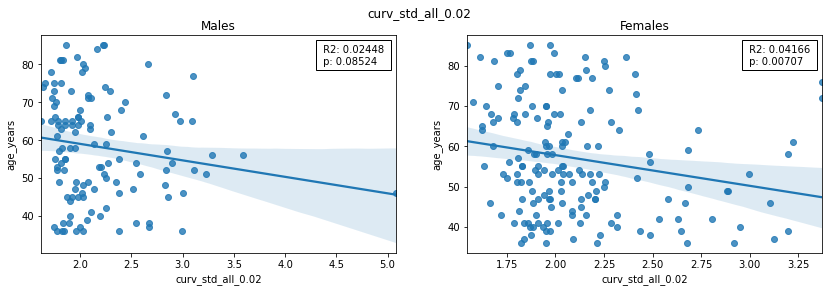

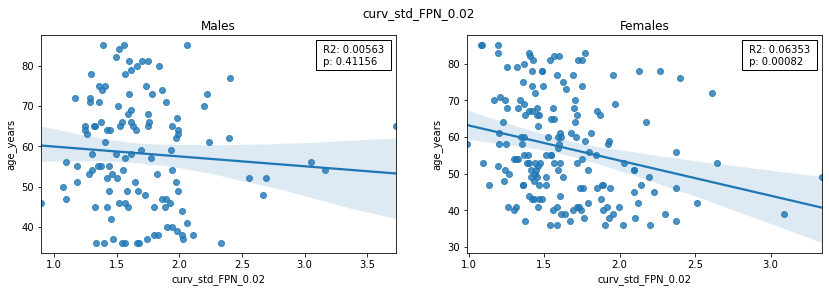

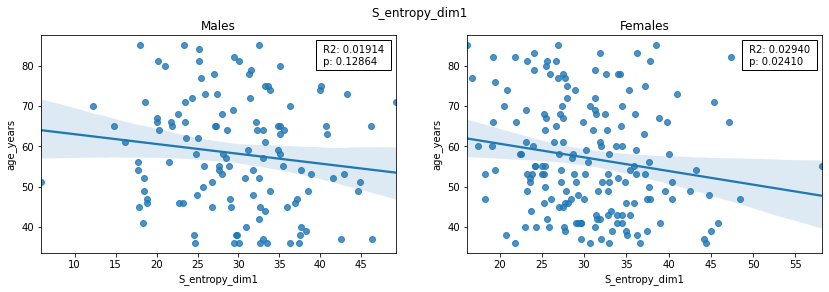

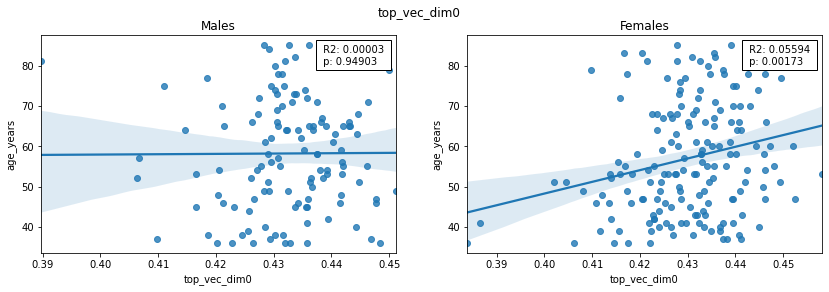

In [59]:
for x in best_predictors:
    regplot_mf(x, 'age_years', 1)


---------------- y = age_years ----------------

                   age_years
bc_AUC_dim0         0.332123
S_entropy_dim0      0.294829
bc_AUC_dim1         0.183234
curv_std_DMN_0.02   0.163044
curv_std_DMN_0.05   0.159799


Number excluded: 0


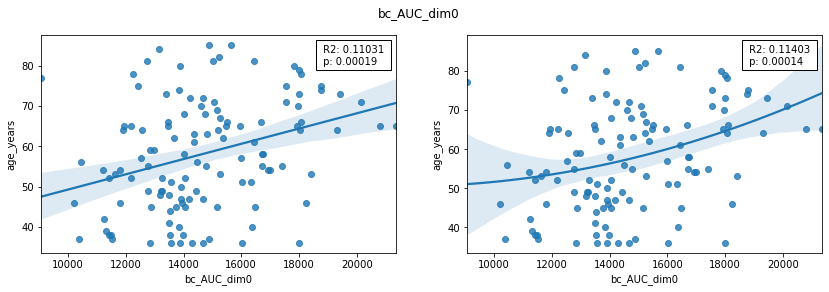

Number excluded: 2


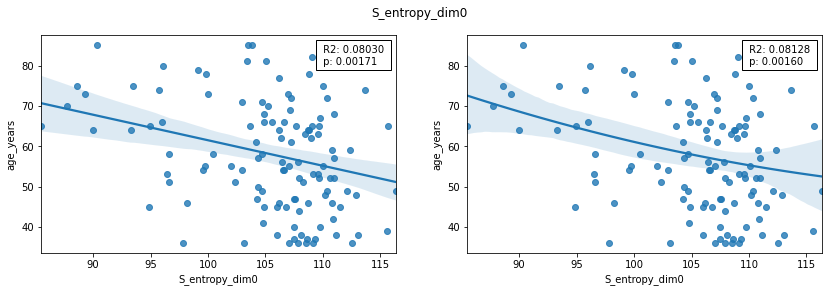

Number excluded: 0


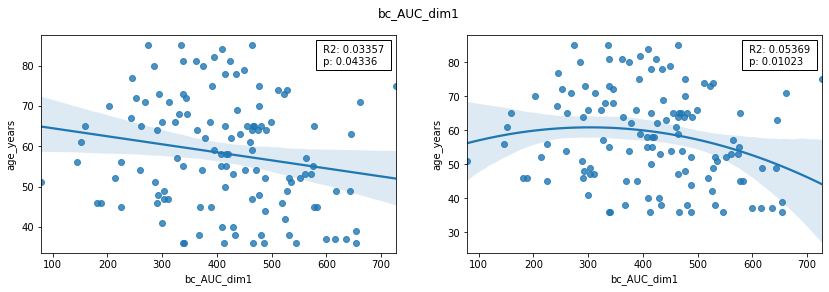

Number excluded: 2


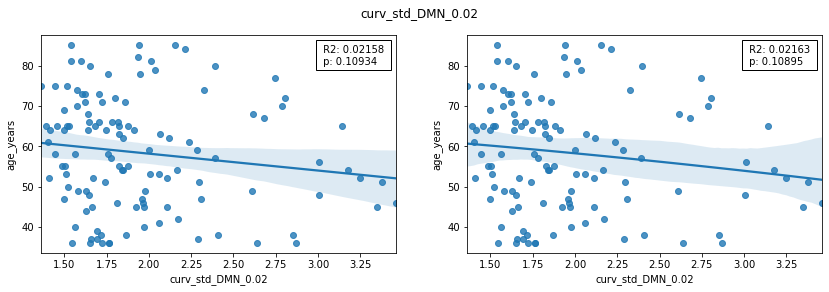

Number excluded: 2


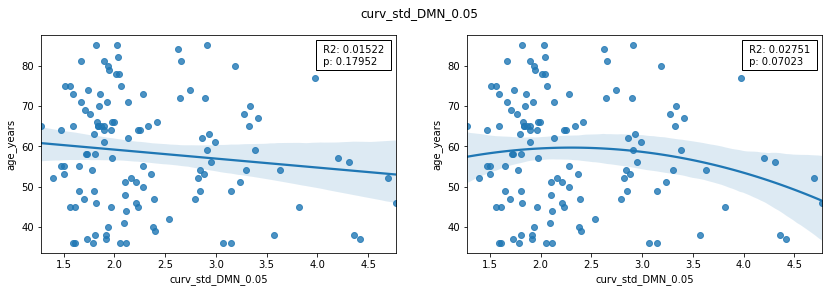

In [64]:
selected_features = list(tda_features)
to_remove = ['curv_skew_FPN_0.05', 'curv_kur_FPN_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features]

best_predictors = get_best_predictors(selected_features, 'age_years', males, n=5, zscore=3)


---------------- y = age_years ----------------

                   age_years
bc_AUC_dim0         0.427240
S_entropy_dim0      0.418952
curv_std_FPN_0.02   0.252059
top_vec_dim0        0.236508
curv_std_FPN_0.05   0.236024


Number excluded: 1


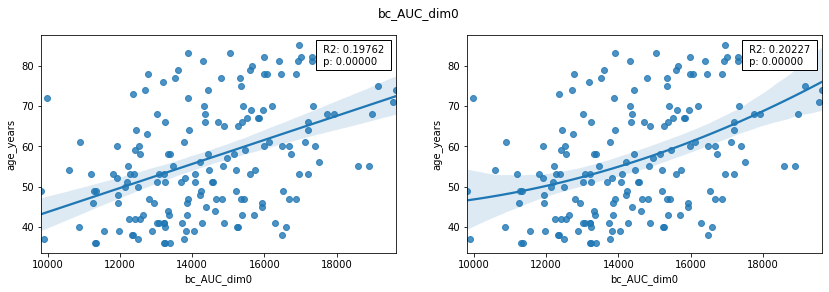

Number excluded: 3


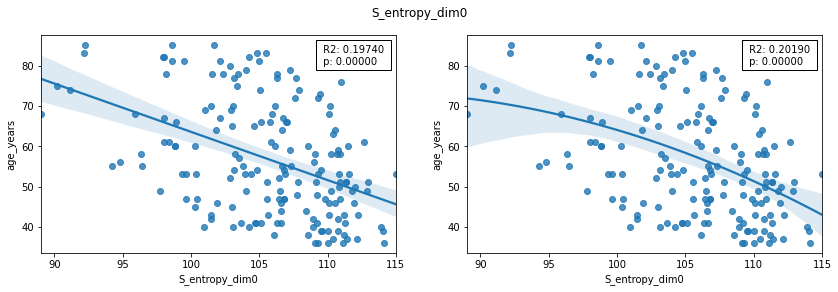

Number excluded: 2


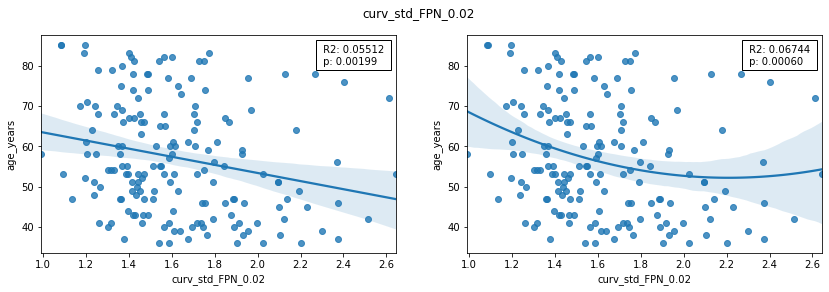

Number excluded: 2


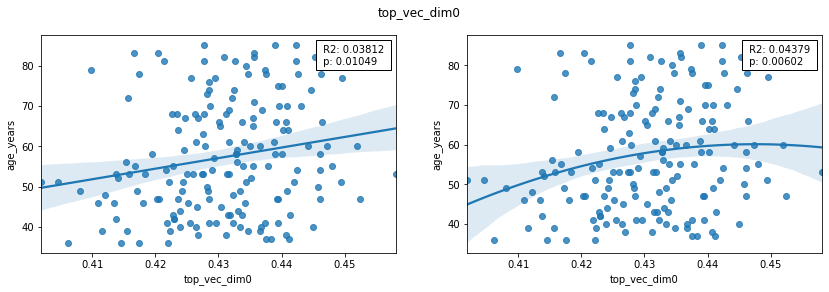

Number excluded: 4


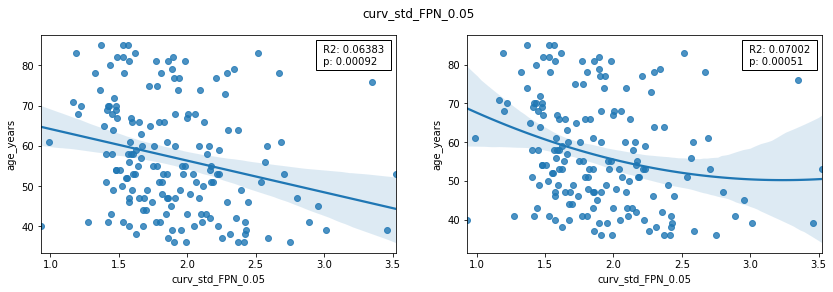

In [65]:
selected_features = list(tda_features)
to_remove = ['curv_skew_FPN_0.05', 'curv_kur_FPN_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features]

best_predictors = get_best_predictors(selected_features, 'age_years', females, n=5, zscore=3)